11:30:46 - cmdstanpy - INFO - Chain [1] start processing


11:30:47 - cmdstanpy - INFO - Chain [1] done processing


MAE : 60.99794892991312
RMSE: 74.88292708925746
MAPE: 45.52049486733755


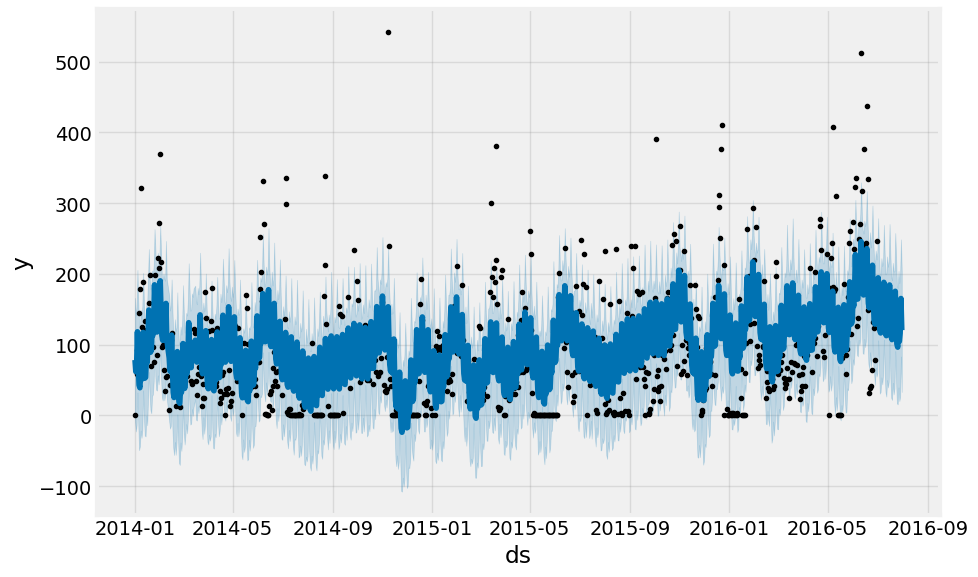

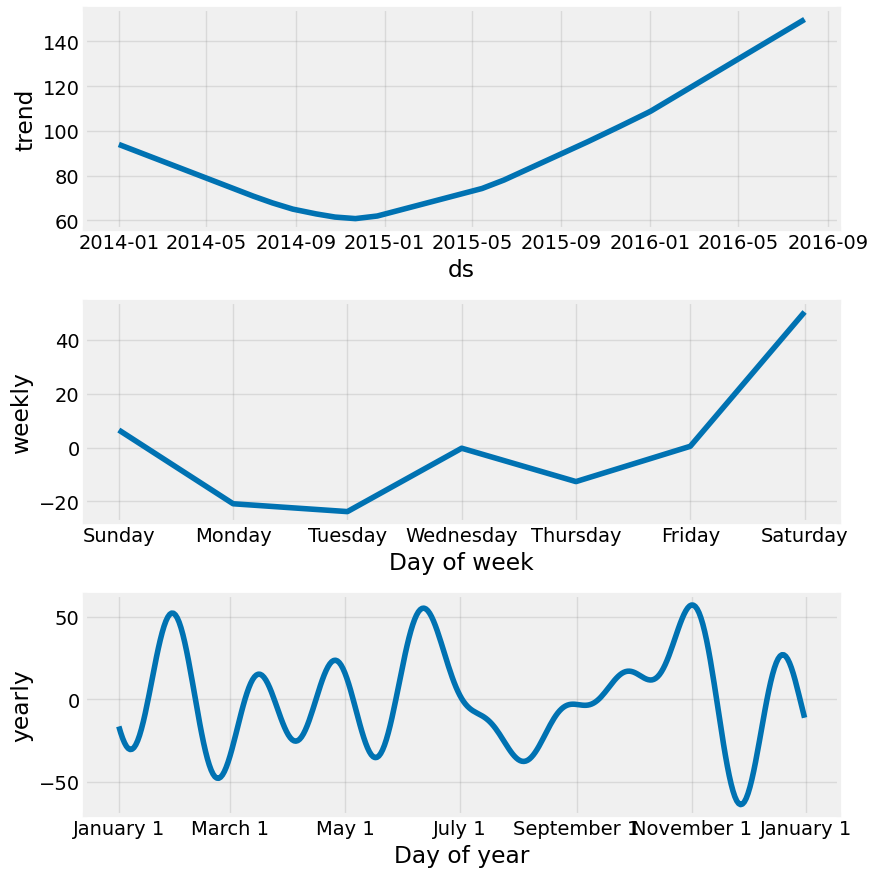

In [ ]:
# ===================== INSTALL (RUN ONCE) =====================
!pip install numpy pandas matplotlib seaborn scikit-learn prophet

# ===================== IMPORTS =====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")

# ===================== METRICS =====================
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
x
df = pd.read_csv(
    r"C:\Users\Hemanth\Downloads\mock_kaggle.csv"
)

# ===================== PREPARE FOR PROPHET =====================
# assumes first column = date, second column = sales
df = df.rename(columns={
    df.columns[0]: "ds",
    df.columns[1]: "y"
})

df["ds"] = pd.to_datetime(df["ds"])
df = df.sort_values("ds")

# ===================== TRAIN / TEST SPLIT =====================
train = df.iloc[:-30]
test  = df.iloc[-30:]

# ===================== MODEL =====================
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
model.fit(train)

# ===================== FORECAST =====================
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# ===================== EVALUATION (ERROR-FREE) =====================
pred = forecast.tail(30)["yhat"].values

mae  = mean_absolute_error(test["y"], pred)
rmse = np.sqrt(mean_squared_error(test["y"], pred))
mape_val = mape(test["y"], pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape_val)

# ===================== PLOTS =====================
model.plot(forecast)
plt.show()

model.plot_components(forecast)
plt.show()

# ===================== EXPORT FOR POWER BI =====================
forecast_out = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
forecast_out.to_csv("prophet_forecast_output.csv", index=False)
